# Import necessary libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler

In [3]:
# Load the dataset
data = pd.read_csv("C:\\Users\\MUTHU SELVI\\Documents\\consensus.csv.csv")


# Data Overview

## Key statistics and distributions of critical variables
## Initial observations and any interesting findings from preliminary data exploration

In [6]:
print("Data Overview:")

Data Overview:


In [7]:
data.head(9)  # Display first 9 rows

,AAGE,ACLSWKR,ADTINK,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,...,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,AHRSPAY,year,income_bracket
0,73,Not in universe,0,0,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,0,94,-50000
2,18,Not in universe,0,0,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,...,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,0,95,-50000
3,9,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,0,94,-50000
4,10,Not in universe,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,0,94,-50000
5,48,Private,40,10,Some college but no degree,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,...,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,1200,95,-50000
6,42,Private,34,3,Bachelors degree(BA AB BS),Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,0,94,-50000
7,28,Private,4,40,High school graduate,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,0,95,-50000
8,47,Local government,43,26,Some college but no degree,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,White,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,876,95,-50000


In [8]:
print(data.shape)     # Print shape of the dataset

(199523, 42)


In [9]:
print(data.columns)   # Display column names

Index(['AAGE', 'ACLSWKR', 'ADTINK', 'ADTOCC', 'AHGA', 'AHSCOL', 'AMARITL',
       'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE',
       'AWKSTAT', 'CAPGAIN', 'GAPLOSS', 'DIVVAL', 'FILESTAT', 'GRINREG',
       'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWRT', 'MIGMTR1', 'MIGMTR3',
       'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY',
       'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN',
       'WKSWORK', 'AHRSPAY', 'year', 'income_bracket'],
      dtype='object')


In [10]:
print(data.info())    # Print concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   AAGE            199523 non-null  int64  
 1   ACLSWKR         199523 non-null  object 
 2   ADTINK          199523 non-null  int64  
 3   ADTOCC          199523 non-null  int64  
 4   AHGA            199523 non-null  object 
 5   AHSCOL          199523 non-null  object 
 6   AMARITL         199523 non-null  object 
 7   AMJIND          199523 non-null  object 
 8   AMJOCC          199523 non-null  object 
 9   ARACE           199523 non-null  object 
 10  AREORGN         199523 non-null  object 
 11  ASEX            199523 non-null  object 
 12  AUNMEM          199523 non-null  object 
 13  AUNTYPE         199523 non-null  object 
 14  AWKSTAT         199523 non-null  object 
 15  CAPGAIN         199523 non-null  int64  
 16  GAPLOSS         199523 non-null  int64  
 17  DIVVAL    

In [11]:
data.describe() # Summary statistics

,AAGE,ADTINK,ADTOCC,CAPGAIN,GAPLOSS,DIVVAL,MARSUPWRT,NOEMP,SEOTR,VETYN,WKSWORK,AHRSPAY,year
count,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,55.426908,94.499672
std,22.310895,18.067129,14.454204,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,274.896454,0.500001
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,0.000000,94.000000
75%,50.000000,33.000000,26.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,0.000000,95.000000
max,90.000000,51.000000,46.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,9999.000000,95.000000


In [12]:
# List of categorical variables
categorical_vars = ['ACLSWKR', 'AMARITL', 'ARACE', 'ASEX', 'AUNMEM', 'AWKSTAT', 'FILESTAT', 'PRCITSHP', 'SEOTR']

In [13]:
# Determine unique values and frequencies for each categorical variable
for var in categorical_vars:
    print(f"Unique values and frequencies for '{var}':")
    print(data[var].value_counts())
    print("\n")


Unique values and frequencies for 'ACLSWKR':
ACLSWKR
Not in universe                   100245
Private                            72028
Self-employed-not incorporated      8445
Local government                    7784
State government                    4227
Self-employed-incorporated          3265
Federal government                  2925
Never worked                         439
Without pay                          165
Name: count, dtype: int64


Unique values and frequencies for 'AMARITL':
AMARITL
Never married                      86485
Married-civilian spouse present    84222
Divorced                           12710
Widowed                            10463
Separated                           3460
Married-spouse absent               1518
Married-A F spouse present           665
Name: count, dtype: int64


Unique values and frequencies for 'ARACE':
ARACE
White                          167365
Black                           20415
Asian or Pacific Islander        5835
Other              

# Data Cleaning and Preprocessing

In [15]:
## Dropping duplicates
data.drop_duplicates(inplace=True)
print("After dropping duplicates, the dataset shape:", data.shape)

After dropping duplicates, the dataset shape: (196294, 42)


In [16]:
## Check for missing values
missing_values = data.isnull()
missing_values_summary = missing_values.sum()
print("Summary of Missing Values:")
print(missing_values_summary)

Summary of Missing Values:
AAGE                  0
ACLSWKR               0
ADTINK                0
ADTOCC                0
AHGA                  0
AHSCOL                0
AMARITL               0
AMJIND                0
AMJOCC                0
ARACE                 0
AREORGN               0
ASEX                  0
AUNMEM                0
AUNTYPE               0
AWKSTAT               0
CAPGAIN               0
GAPLOSS               0
DIVVAL                0
FILESTAT              0
GRINREG               0
GRINST              707
HHDFMX                0
HHDREL                0
MARSUPWRT             0
MIGMTR1           98015
MIGMTR3           98015
MIGMTR4           98015
MIGSAME               0
MIGSUN            98015
NOEMP                 0
PARENT                0
PEFNTVTY           6703
PEMNTVTY           6107
PENATVTY           3389
PRCITSHP              0
SEOTR                 0
VETQVA                0
VETYN                 0
WKSWORK               0
AHRSPAY               0
year         

In [17]:
## Drop rows with missing values
data.dropna(axis=0, inplace=True)  # Drop rows with missing values
data.dropna(axis=1, inplace=True)  # Drop columns with missing values
print("After dropping missing values, the dataset shape:", data.shape)

After dropping missing values, the dataset shape: (93590, 42)


## Outlier detection and treatment

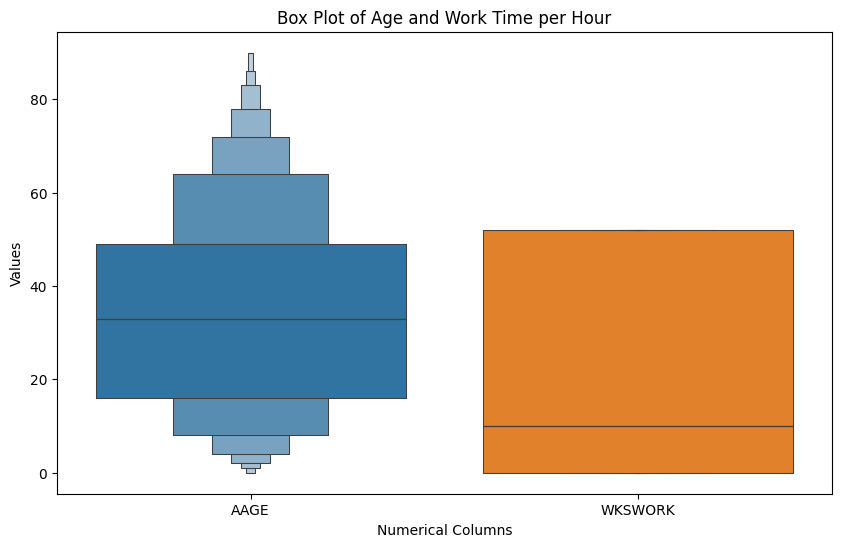

In [19]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=data[['AAGE', 'WKSWORK']])
plt.title("Box Plot of Age and Work Time per Hour")
plt.xlabel("Numerical Columns")
plt.ylabel("Values")
plt.show()

## Feature Scaling

In [21]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['AAGE', 'CAPGAIN']])

scaler = StandardScaler()
standardized_data = scaler.fit_transform(data[['AAGE', 'CAPGAIN']])

## One-hot encoding

In [23]:
encoded_data = pd.get_dummies(data['ASEX'], prefix='encoded', drop_first=True)

In [24]:
## Label encoding
label_encoder = LabelEncoder()
data['encoded_column'] = label_encoder.fit_transform(data['AMARITL'])
print("Encoded column:")
print(data['encoded_column'])

Encoded column:
1         0
3         4
4         4
6         2
9         2
         ..
199509    2
199510    4
199514    6
199516    4
199519    2
Name: encoded_column, Length: 93590, dtype: int32


# Visualization of Insights

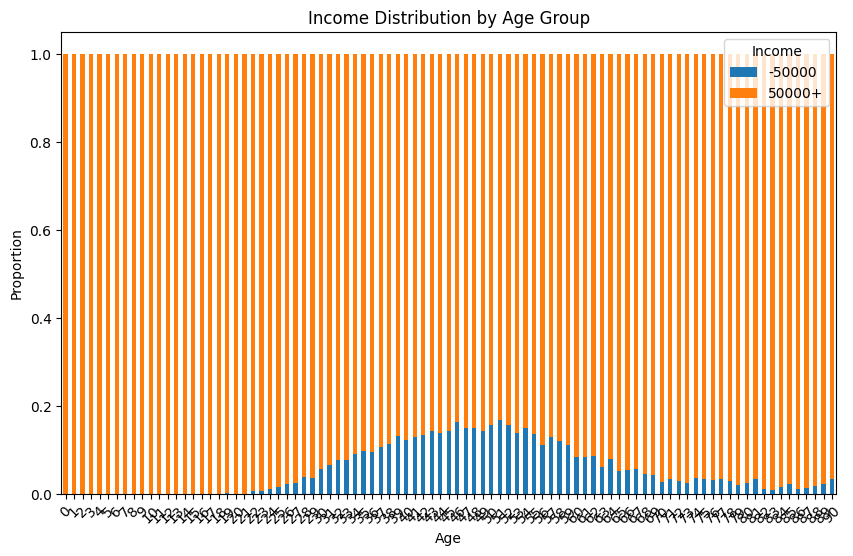

In [26]:
## Income Distribution by Age Group
income_distribution = data.groupby('AAGE')['income_bracket'].value_counts(normalize=True).unstack()
income_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title('Income Distribution by Age Group')
plt.legend(title='Income', loc='upper right', labels=['-50000', '50000+'])
plt.xticks(rotation=45)
plt.show()

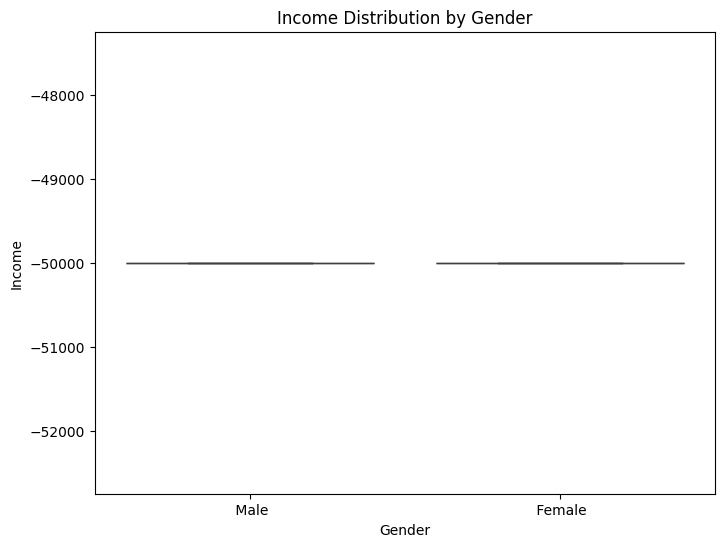

In [27]:
## Income Distribution by Gender
# Convert income_bracket to numeric (assuming it contains numeric values)
data['income_bracket'] = pd.to_numeric(data['income_bracket'], errors='coerce')

# Visualize income distribution by gender using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='ASEX', y='income_bracket', data=data)
plt.xlabel('Gender')
plt.ylabel('Income')
plt.title('Income Distribution by Gender')
plt.show()

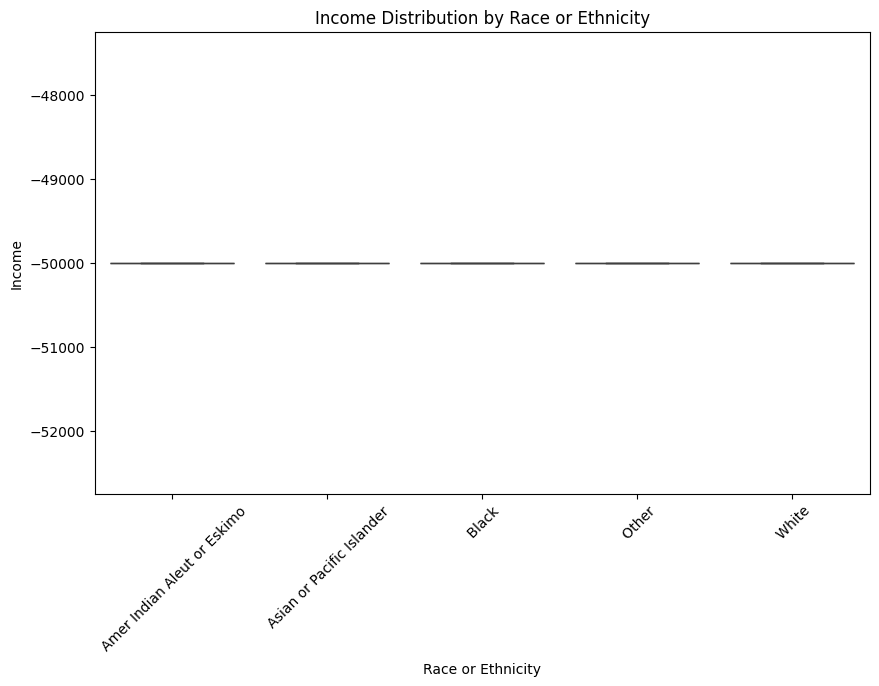

Median Incomes by Race or Ethnicity:
ARACE
Amer Indian Aleut or Eskimo   -50000.0
Asian or Pacific Islander     -50000.0
Black                         -50000.0
Other                         -50000.0
White                         -50000.0
Name: income_bracket, dtype: float64


In [28]:
## Income Distribution by Race or Ethnicity
grouped_data = data.groupby('ARACE')['income_bracket']
median_incomes = grouped_data.median().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.boxplot(x='ARACE', y='income_bracket', data=data, order=median_incomes.index)
plt.xlabel('Race or Ethnicity')
plt.ylabel('Income')
plt.title('Income Distribution by Race or Ethnicity')
plt.xticks(rotation=45)
plt.show()
print("Median Incomes by Race or Ethnicity:")
print(median_incomes)

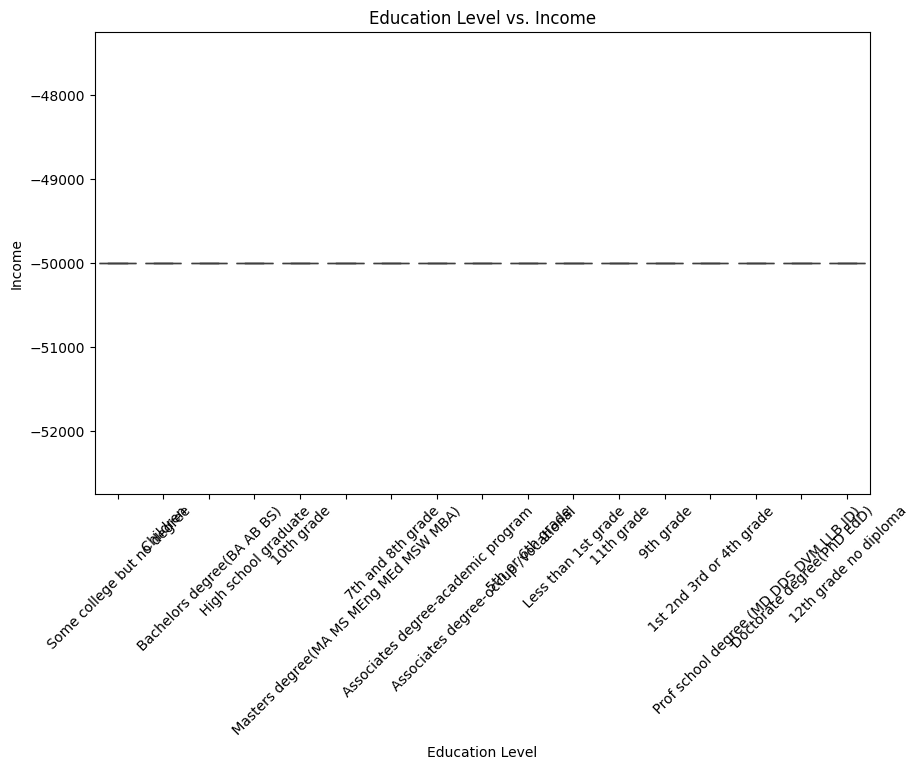

In [29]:
## Income Distribution by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='AHGA', y='income_bracket', data=data)
plt.title("Education Level vs. Income")
plt.xlabel("Education Level")
plt.ylabel("Income")
plt.xticks(rotation=45)
plt.show()


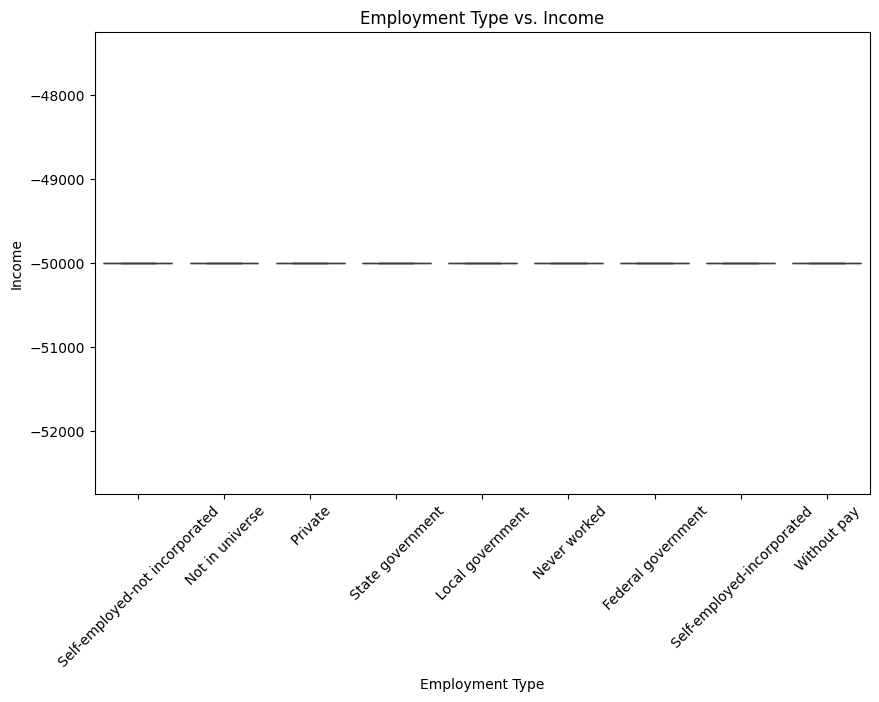

In [30]:
## Income Distribution by Employment Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='ACLSWKR', y='income_bracket', data=data)
plt.title("Employment Type vs. Income")
plt.xlabel("Employment Type")
plt.ylabel("Income")
plt.xticks(rotation=45)
plt.show()


C:\Users\MUTHU SELVI\AppData\Roaming\Python\Python312\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\MUTHU SELVI\AppData\Roaming\Python\Python312\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


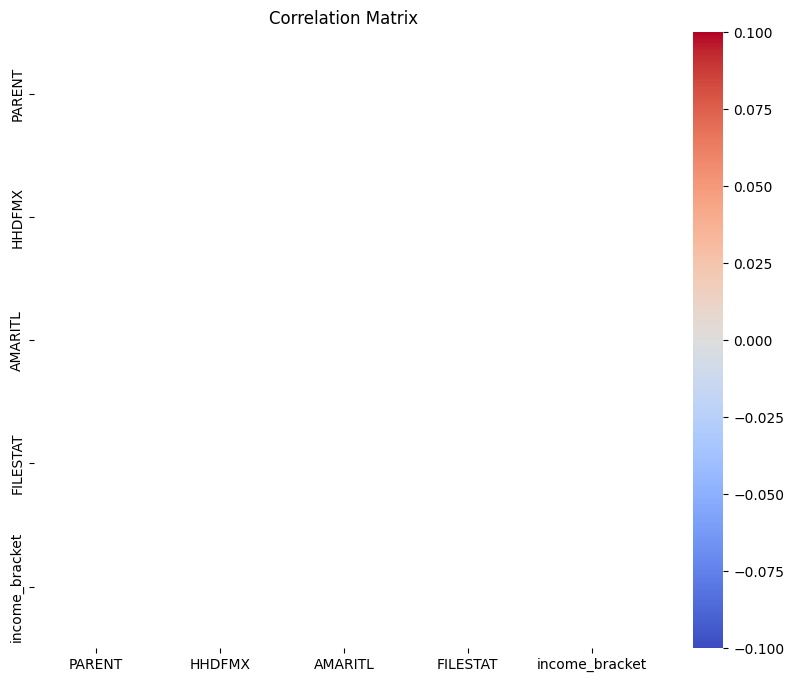

In [31]:
# Replace ' Not in universe' with NaN
data.replace(' Not in universe', np.nan, inplace=True)

# Convert columns to numeric
data[['PARENT', 'HHDFMX', 'AMARITL', 'FILESTAT', 'income_bracket']] = data[['PARENT', 'HHDFMX', 'AMARITL', 'FILESTAT', 'income_bracket']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Correlation analysis between selected variables
correlation_matrix = data[['PARENT', 'HHDFMX', 'AMARITL', 'FILESTAT', 'income_bracket']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

## Geographic and Migration Insights

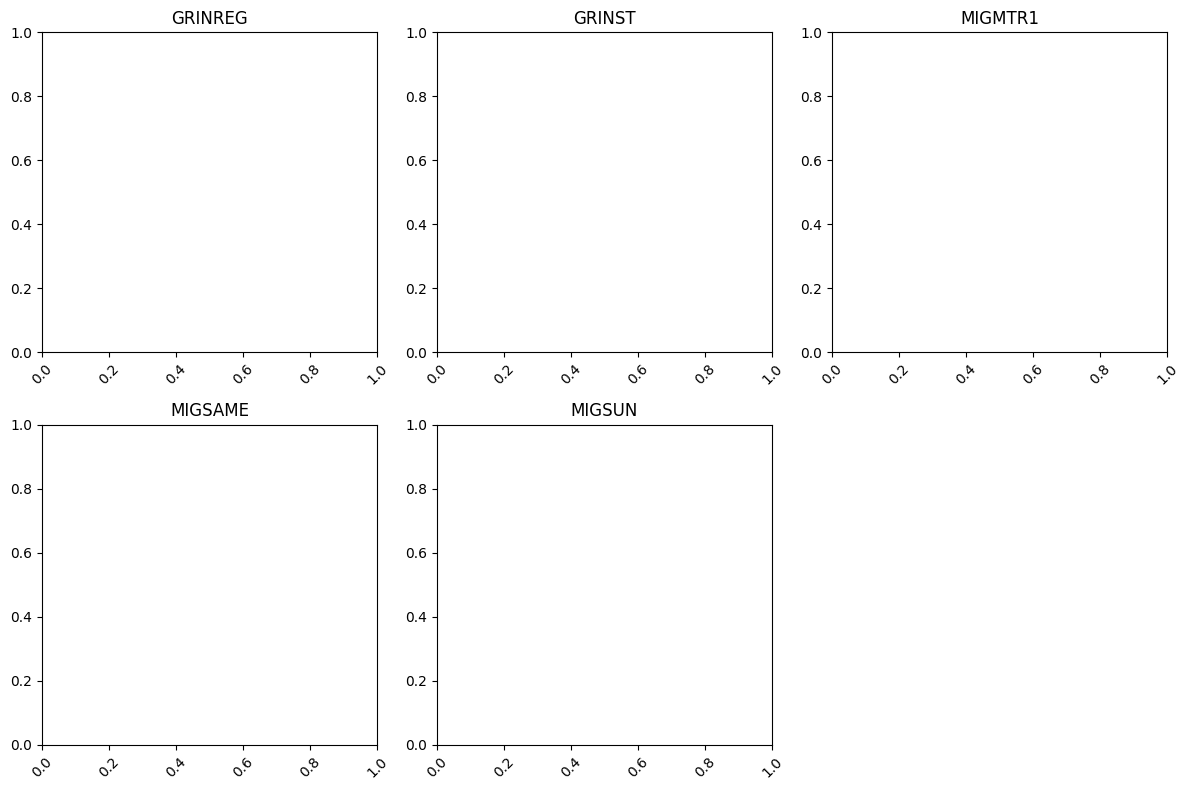

In [33]:
# Select a subset of geographical and migration-related variables
geo_migration_vars = ['GRINREG', 'GRINST', 'MIGMTR1', 'MIGSAME', 'MIGSUN']

# Filter out non-existent variables
geo_migration_vars = [var for var in geo_migration_vars if var in data.columns]

# Remove rows with missing values in the selected variables
data_geo_migration = data.dropna(subset=geo_migration_vars)

# Visualize geographic and migration-related insights using count plots
plt.figure(figsize=(12, 8))
for i, var in enumerate(geo_migration_vars, 1):
    if var in data_geo_migration.columns:  # Check if the variable exists in the DataFrame
        plt.subplot(2, 3, i)
        sns.countplot(x=var, data=data_geo_migration)
        plt.title(var)
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_8928\2727425719.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CAPGAIN'].fillna(data['CAPGAIN'].mean(), inplace=True)
C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_8928\2727425719.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

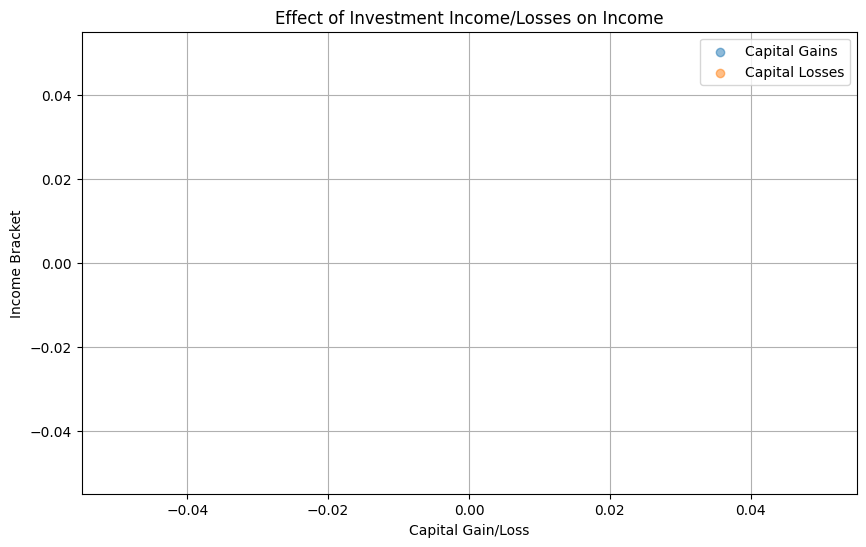

In [34]:
# impute missing values
data['CAPGAIN'].fillna(data['CAPGAIN'].mean(), inplace=True)
data['GAPLOSS'].fillna(data['GAPLOSS'].mean(), inplace=True)

# Filter out rows with missing values in investment-related columns
investment_data = data.dropna(subset=['CAPGAIN', 'GAPLOSS'])

# Visualize Investment Income/Losses Effect on Income
plt.figure(figsize=(10, 6))
plt.scatter(investment_data['CAPGAIN'], investment_data['income_bracket'], label='Capital Gains', alpha=0.5)
plt.scatter(investment_data['GAPLOSS'], investment_data['income_bracket'], label='Capital Losses', alpha=0.5)
plt.xlabel('Capital Gain/Loss')
plt.ylabel('Income Bracket')
plt.title('Effect of Investment Income/Losses on Income')
plt.legend()
plt.grid(True)
plt.show()


# example visualizations

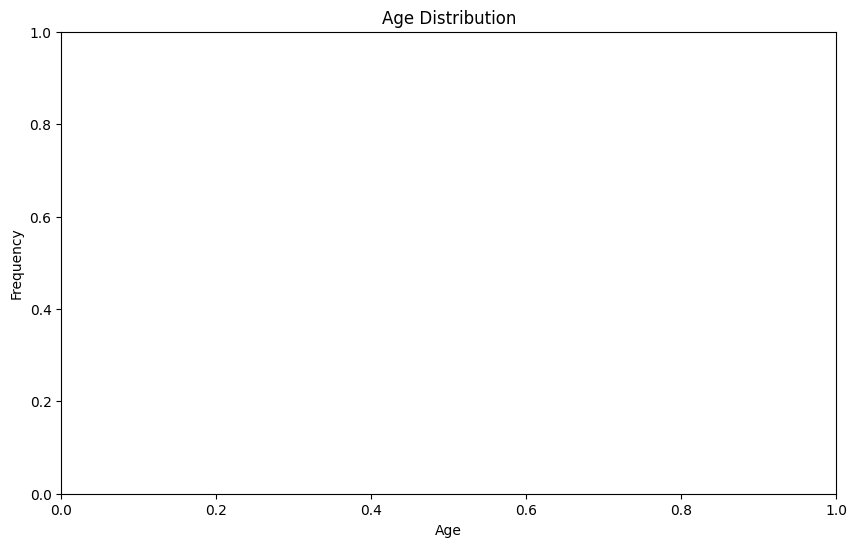

In [36]:
## Histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['AAGE'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

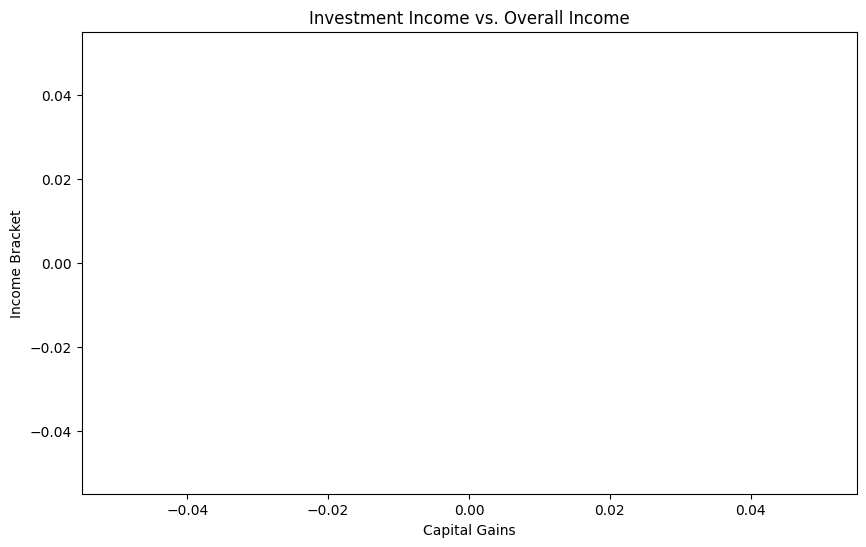

In [37]:

## Scatter plot of Investment Income vs. Overall Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CAPGAIN', y='income_bracket', data=data)
plt.title('Investment Income vs. Overall Income')
plt.xlabel('Capital Gains')
plt.ylabel('Income Bracket')
plt.show()